# Основы кластерного анализа

**Кластерный анализ (Data clustering)** — это задача машинного обучения БЕЗ УЧИТЕЛЯ, которая заключается в разбиении (группировки) заданной выборки данных (объектов) так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров значительно отличались друг от друга.

**Входные данные:**<br>

- $N$ - мерная матрица признаков и их значений.

**Задача:**<br>
Объеденить объекты на K кластеров так, что бы:<br>
1. Объекты в одном кластере были максимально похожи друг на друга, а<br>
2. Объекты в разных кластерах существенно бы отличались друг от друга.

**Выходные данные:**<br>

K кластеров данных, объедененных по каким-то признакам.

_____
**Математическое определение кластеризации**

Пусть у нас есть множество данных:
$$X = \{ x_1, x_2, ..., x_n \}, \quad x_i \in \mathbb{R}^d$$

где $n$ — число объектов, а $d$ — размерность признакового пространства.
Кластеризация — это разбиение множества $X$ на $K$ непересекающихся кластеров $C_1, C_2, ..., C_K$​, такое что:
$C_1 \cup C_2 \cup ... \cup C_K = X$

$$C_i \cap C_j = \emptyset, \quad \forall i \neq j$$

___________
Задача кластеризации формулируется как поиск оптимального разбиения, при котором элементы внутри одного кластера максимально схожи, а элементы из разных кластеров максимально различны.


Основные задачи кластеризации:

- Выявление скрытых структур в данных.
- Упрощение и организация информации.
- Поиск аномалий и выбросов.
- Улучшение качества моделей машинного обучения.

Существует несколько классов алгоритмов кластеризации, каждый из которых подходит для разных типов данных:
- Центроидная кластеризация (K-means, K-medoids).
- Иерархическая кластеризация.
- Плотностная кластеризация (DBSCAN, OPTICS).


Кластеризация используется в разных сферах:
- Анализ данных и сегментация пользователей — разделение клиентов на группы по поведению (маркетинг), рекомендательные системы.
- Биология и медицина — группировка генов по схожим свойствам, анализ изображений медицинских снимков.
- Компьютерное зрение — выделение объектов на изображении, кластеризация пикселей.
- Поиск аномалий — выявление мошенничества в банковских операциях, детекция сетевых атак.
- Научные задачи и исследования.

Также кластеризация часто применяется как дополнительный шаг предобработки данных, что в последующем помогает улучшить качество моделей.

*В рекомендательных системах сначала проводят кластеризацию пользователей по их интересам, а затем обучают модель рекомендаций внутри кластеров. Таким образом вы можете обучить для каждой группы пользователей обучить свой алгоритм ML и получить лучший результат.*

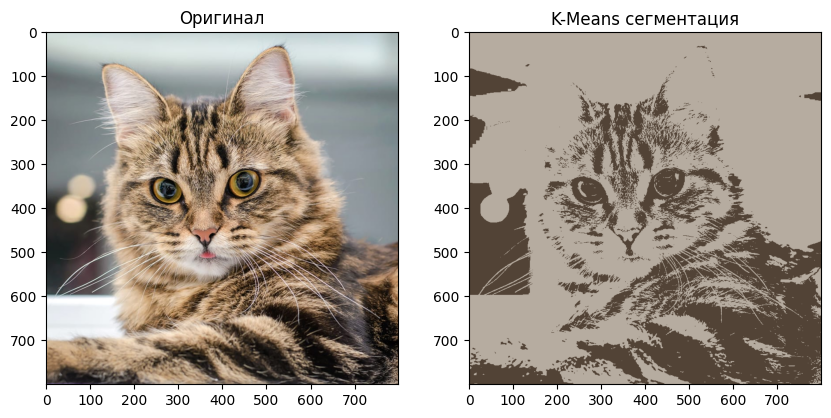

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загружаем изображение в цвете
image = cv2.imread('cat2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Преобразуем в двумерный массив (каждый пиксель - точка в пространстве RGB)
pixels = image.reshape((-1, 3)).astype(np.float32)

# Запускаем K-Means с 2 кластерами
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
_, labels, centers = cv2.kmeans(pixels, 2, None, criteria, 12, cv2.KMEANS_RANDOM_CENTERS)

# Меняем пиксели на их центроиды (уменьшаем количество цветов)
segmented_image = centers[labels.flatten()].reshape(image.shape).astype(np.uint8)

# Отображаем результат
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image), plt.title('Оригинал')
plt.subplot(1,2,2), plt.imshow(segmented_image), plt.title('K-Means сегментация')
plt.show()

# Метод k-средних

**K-Means** — один из самых простых и эффективных алгоритмов кластеризации, который работает по принципу минимизации внутрикластерного расстояния. Цель состоит в том, чтобы сгруппировать похожие точки данных вместе и обнаружить базовые закономерности или структуры в данных.

**K-means** — это алгоритм на основе центроида или алгоритм на основе расстояния, где мы вычисляем расстояния для назначения точки кластеру. В K-means каждый кластер связан с центроидом.

________

**Центроид** — это средняя (центральная) точка кластера, которая минимизирует сумму расстояний до всех точек внутри этого кластера.

Если у нас есть кластер из nnn точек $x_1, x_2, ..., x_n$​, то его центроид $$C$$ вычисляется как среднее арифметическое всех точек:
$$C = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Геометрически, центроид — это точка, вокруг которой сосредоточены все объекты кластера.

________

## Как происходит разбиение данных на кластеры?

Возникает он из следующей оптимизационной задачи: у нас есть некоторое множество объектов, мы хотим найти в них k кластеров, каждый из которых характеризуется центроидом Сk. Объект относится к соответствующему кластеру, если его центроид находится ближе других центроидов к этому объекту.

Алгоритм состоит из следующих шагов:
1. Инициализация центроидов (например, рандомно)
2. Обновление состава кластеров, то есть приписывание объекта к тому кластеру, центроид которого расположен ближе к этому объекту.
3. Обновление положения самих центроидов, то есть пересчитывание положения центроидов, как центра масс объектов, которые лежат в соответствующем кластере.
4. Шаги 2 и 3 продолжаются до тех пор пока не выполнятся некоторые правила останова, например, будет достигнуто какое-то максимальное количество итераций или пока кластеры не перестанут меняться.


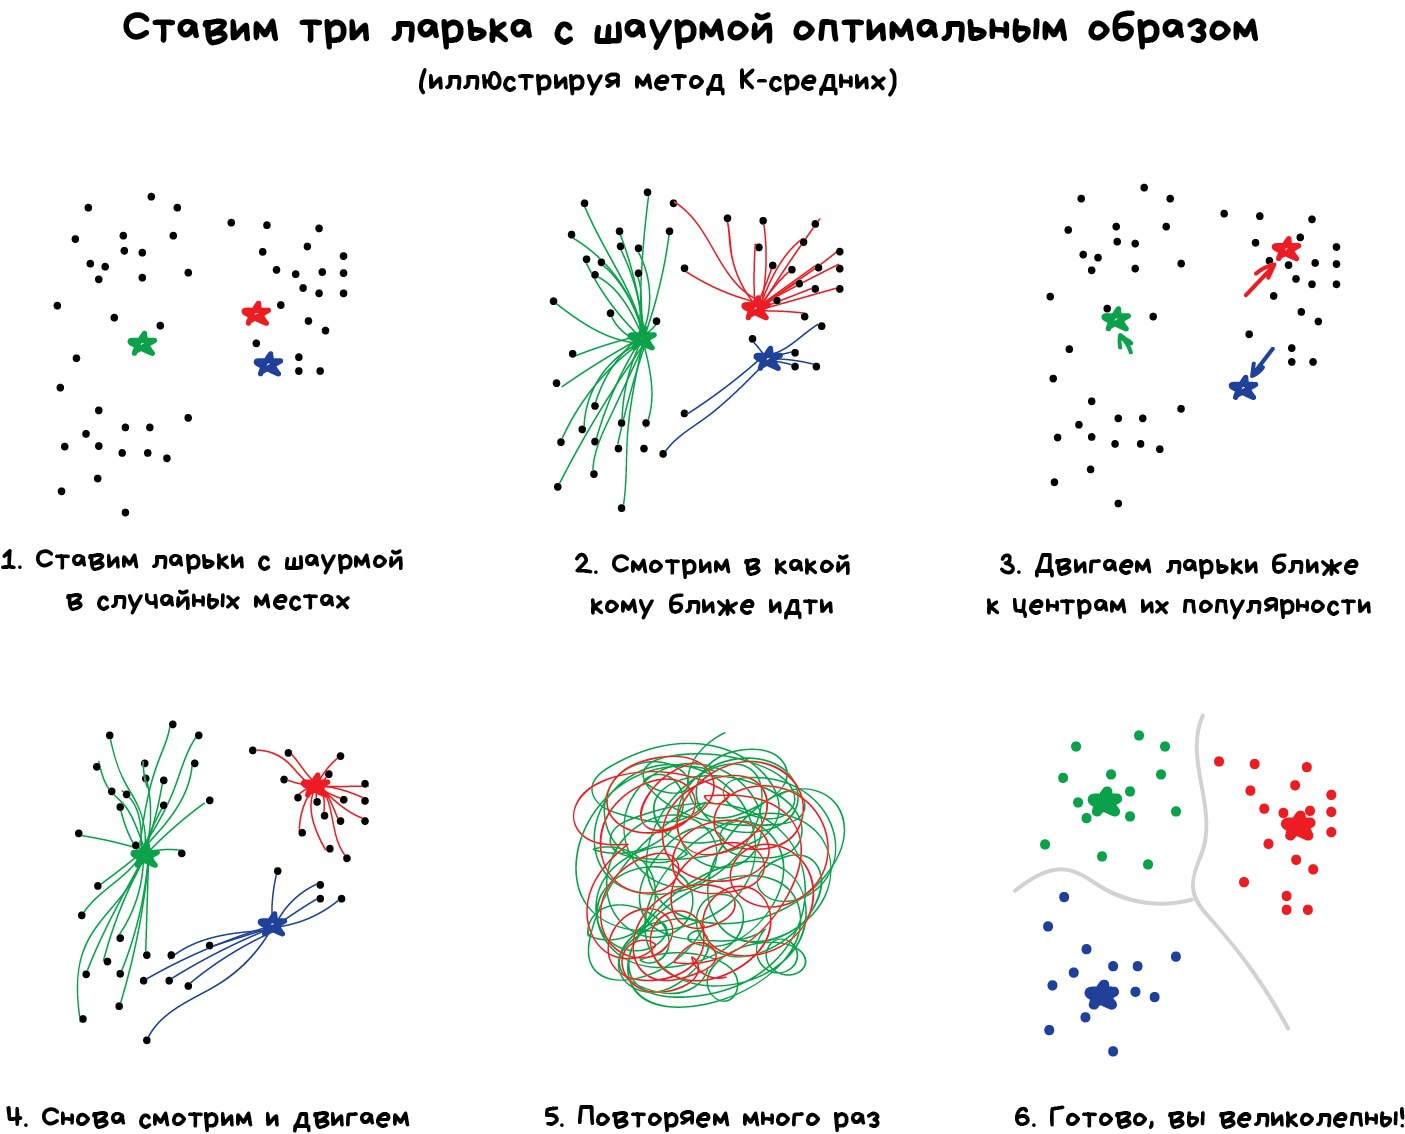

Отсюда же вытекают достоинства и недостатки K-Means.

Плюсы:
- Простота и скорость работы.
- Хорошо работает на больших объемах данных.
- Интерпретируемые результаты.

Минусы:
- Чувствителен к выбору начальных центроидов.
- Требует заранее задавать число кластеров $K$.
- Плохо работает с кластерами сложной формы (не круглыми).


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

<ipython-input-9-268db7de3a32>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


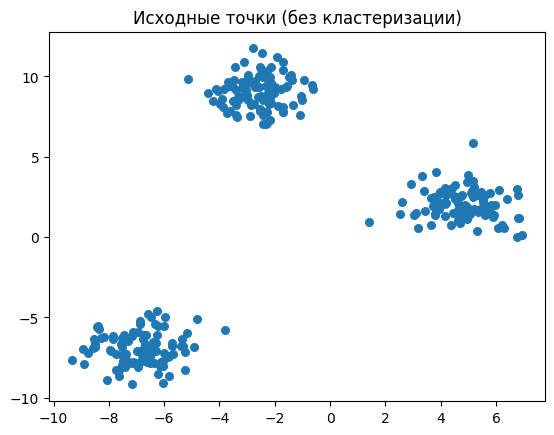

In [9]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Визуализируем данные
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Исходные точки (без кластеризации)")
plt.show()

In [10]:
# Определяем K-Means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Обучаем модель
kmeans.fit(X)

# Получаем предсказанные метки кластеров
labels = kmeans.labels_

# Получаем координаты центроидов
centroids = kmeans.cluster_centers_

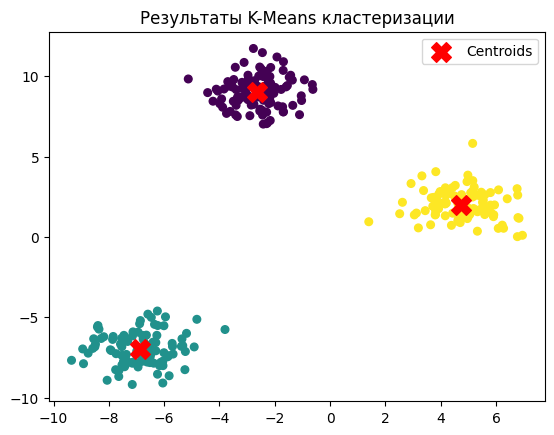

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Результаты K-Means кластеризации")
plt.legend()
plt.show()

## Как найти оптимальное число кластеров k?

K-Means требует заранее задать число кластеров $K$, но как его выбрать? В предыдущем уроке при обучении K-Means вы самостоятельно выбрали количество кластеров — 3. Но оптимальное ли это число, и как найти оптимальное?

Если выбрать слишком маленькое значение, модель объединит несвязанные группы. Если выбрать слишком большое, алгоритм разобьет данные на слишком мелкие группы.

Есть несколько популярных методов для определения оптимального числа кластеров:
- Метод локтя (Elbow Method).
- Метод силуэта (Silhouette Score).


### Метод локтя (Elbow Method)

Метод локтя основан на анализе суммы квадратов расстояний точек до ближайшего центроида (Within-Cluster Sum of Squares, WCSS).

Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться.

Наконец, мы построим график между значениями k и суммой квадрата внутри кластера, чтобы получить значение k. Мы внимательно рассмотрим график. В какой-то момент значение по оси x резко уменьшится (uде уменьшение WCSS резко замедляется (образуется «локоть»).). Эта точка будет считаться оптимальным значением k:

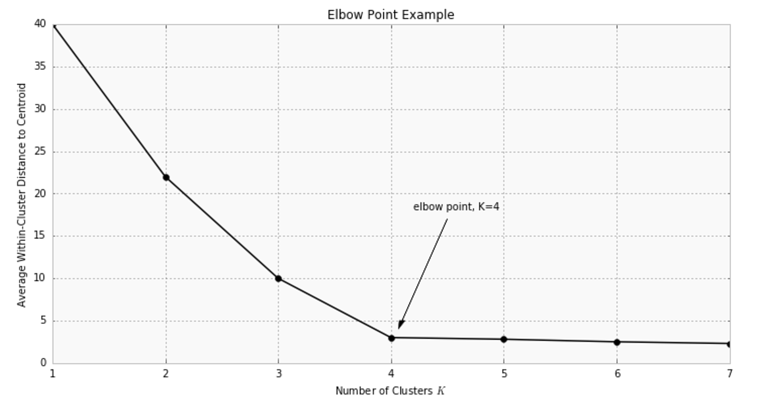

In [14]:
!pip install opendatasets --quiet

In [15]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data")

df = pd.read_csv("/content/unsupervised-learning-on-country-data/Country-data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data


Давайте подберем оптимальное число кластеров для данного датасета. Для этого будем вычислять WCSS (Within-Cluster Sum of Squares) для разного числа кластеров:
1. Перебираем $K$ от 1 до 14.
2. Для каждого $K$ создаем модель KMeans(n_clusters=k).
3. Обучаем модель (fit(X)) и сохраняем метрику inertia_, которая показывает сумму квадратов расстояний точек до их центроидов (чем меньше, тем плотнее кластеры).

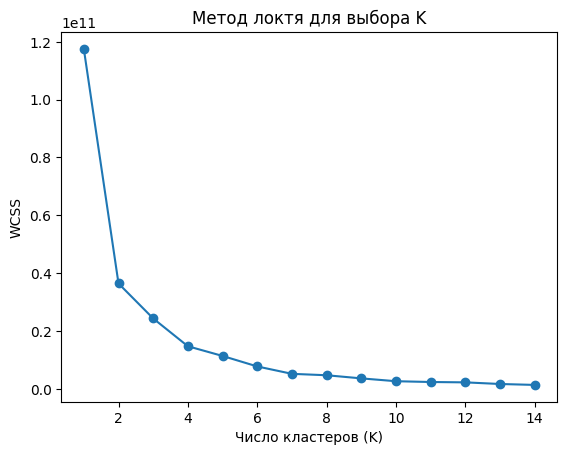

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Создадим вектор признаков
X = df.iloc[:, 1:]

# Считаем WCSS для разных K
wcss = []
K_values = range(1, 15)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ -- сумма квадратов расстояний точек до центроидов

# Строим график
plt.plot(K_values, wcss, marker='o', linestyle='-')
plt.xlabel("Число кластеров (K)")
plt.ylabel("WCSS")
plt.title("Метод локтя для выбора K")
plt.show()

Оптимальное $K$ — это точка, где WCSS перестает резко уменьшаться. На графике это выглядит как «изгиб» (локоть). В данном случае скорее всего подходит $K = 7$, потому что именно после 7 появляется асимптота, и изменения становятся крайне незначительными.

После подбора оптимального числа кластеров заново обучаем алгоритм KMeans на выбранном числе кластеров.

Но не всегда можно по графику локтя определить оптимальное число кластеров, так как в реальных данных не всегда есть явное разделение на кластеры. Даже в примере выше можно колебаться при выборе между 6, 7, 8 кластерами. Поэтому полезно использовать и другой метод выбора числа кластеров вместе с методом локтя — метод силуэта (Silhouette Score).

### Метод силуэта (Silhouette Score)

Метод силуэта позволяет оценить качество кластеризации и определить, насколько хорошо объекты внутри одного кластера схожи между собой и насколько они отделены от других кластеров.

**Как рассчитывается коэффициент силуэта? **
1. Для каждого объекта $i$ в кластере рассчитываются два значения:
    - Внутрикластерное расстояние $a(i)$ — среднее расстояние от точки $i$ до всех других точек внутри ее кластера.
    - Межкластерное расстояние $b(i)$ — среднее расстояние от точки $i$ до точек ближайшего соседнего кластера (того, к которому объект мог бы принадлежать, если бы не был в своем кластере).

Формула силуэтного коэффициента для объекта $i$:
$s(i) = \frac{b(i) - a(i)}{max(a(i), b(i)}$
2. Вычисляется среднее значение силэута для всего кластера по всем его точкам
3. Общее значение силуэта для модели вычисляется как среденее значение силуэта по всем кластерам

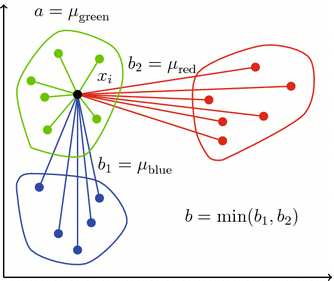


In [17]:
from sklearn.metrics import silhouette_score

k_values = [6, 7, 8]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores[k] = score
    print(f"K = {k}, Silhouette Score: {score:.4f}")

K = 6, Silhouette Score: 0.5929
K = 7, Silhouette Score: 0.5950
K = 8, Silhouette Score: 0.5663


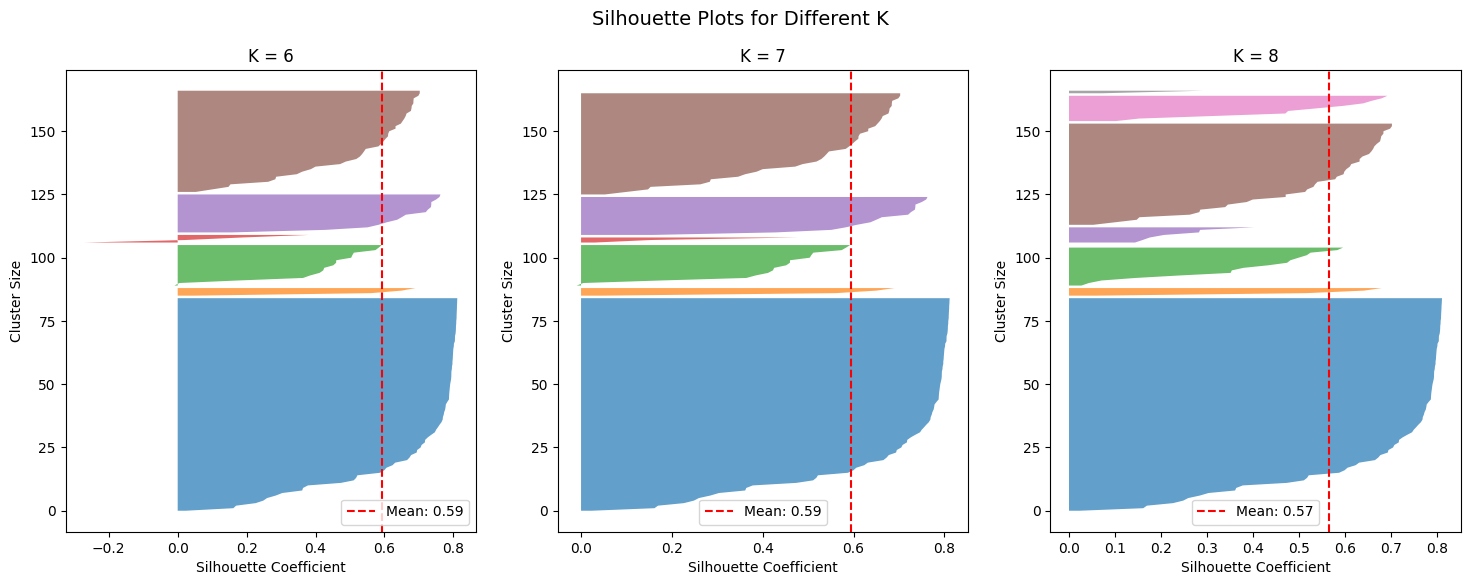

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Функция для построения силуэтных графиков
def plot_silhouette(X, cluster_counts):
    fig, axes = plt.subplots(1, len(cluster_counts), figsize=(18, 6))

    for idx, K in enumerate(cluster_counts):
        kmeans = KMeans(n_clusters=K, random_state=42)
        cluster_labels = kmeans.fit_predict(X)

        # Вычисляем силуэтные коэффициенты
        silhouette_vals = silhouette_samples(X, cluster_labels)

        y_lower, y_upper = 0, 0
        axes[idx].set_title(f"K = {K}")

        for i in range(K):
            cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
            cluster_silhouette_vals.sort()

            y_upper += len(cluster_silhouette_vals)
            axes[idx].fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                cluster_silhouette_vals,
                alpha=0.7
            )
            y_lower = y_upper

        # Средний силуэтный коэффициент
        avg_score = silhouette_score(X, cluster_labels)
        axes[idx].axvline(avg_score, linestyle="--", color="red", label=f"Mean: {avg_score:.2f}")
        axes[idx].legend()
        axes[idx].set_xlabel("Silhouette Coefficient")
        axes[idx].set_ylabel("Cluster Size")

    plt.suptitle("Silhouette Plots for Different K", fontsize=14)
    plt.show()

# Вызываем функцию для K=6, 7, 8
plot_silhouette(X, cluster_counts=[6, 7, 8])

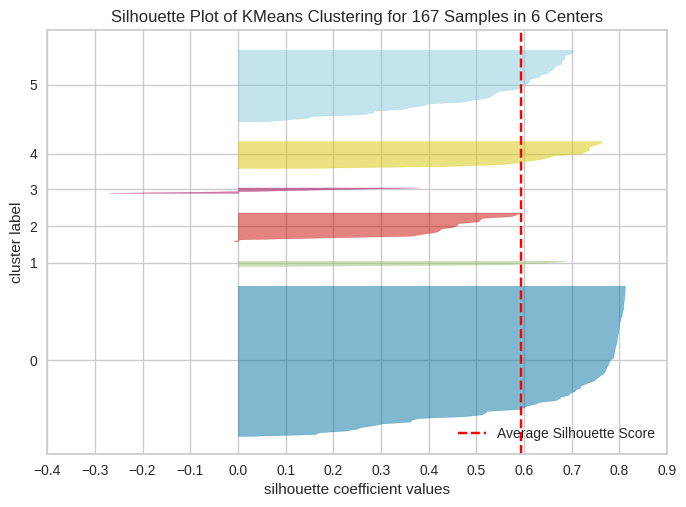

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 167 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

In [ ]:
# Определяем K-Means с 3 кластерами
kmeans = KMeans(n_clusters=7, random_state=42)

# Обучаем модель
kmeans.fit(X)

# Получаем предсказанные метки кластеров
labels = kmeans.labels_

# Получаем координаты центроидов
centroids = kmeans.cluster_centers_

In [ ]:
# Обучаем модель
kmeans.predict(X_new)

### Другие примеры силуэта для обсуждения

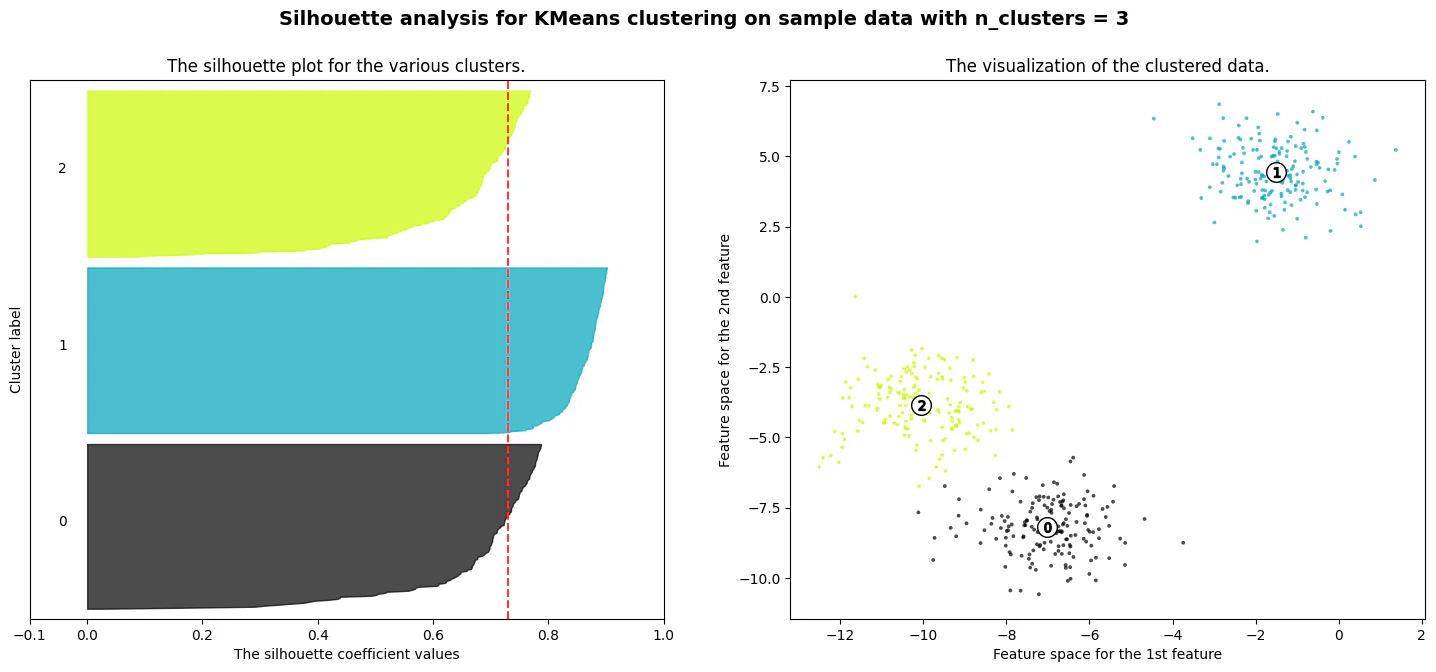

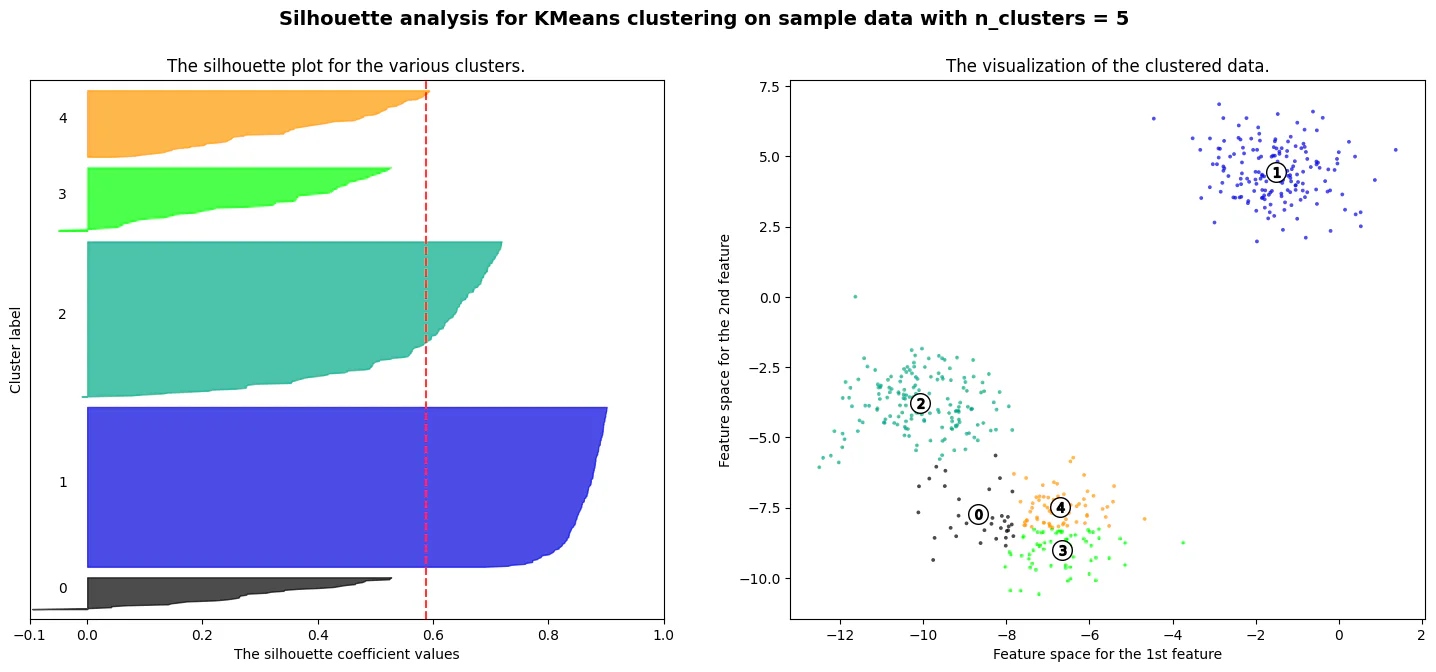

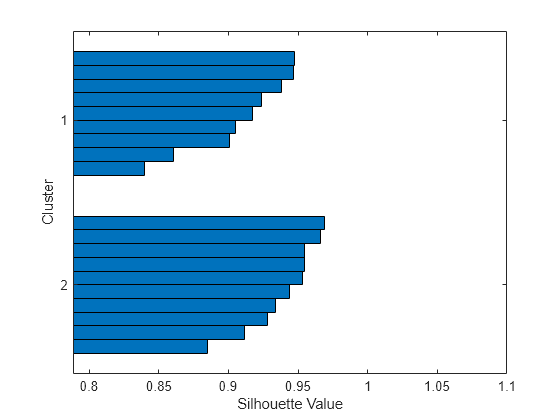

Как интерпретировать графики?

- Один «нож» отвечает за один значение силуэта для одного кластера.

**Ширина «ножа» (высота полосы).**
- Чем шире «нож» — тем больше объектов в этом кластере.
- Если «нож» узкий, значит в этом кластере мало точек.
- Разная высота «ножей» — кластеры несбалансированы.

**Длина ножа (по оси X).**
- Чем длиннее нож — тем лучше кластеризация (высокий силуэт для данного кластера).
- Длинные ножи (близко к 1) означают, что объекты хорошо разделены и далеки от соседних кластеров.
- Короткие «ножи» (близко к 0) означают, что объекты плохо сгруппированы.

**Острота ножа (форма распределения).**

- Острый (заостренный) нож — большинство объектов имеют похожий силуэтный коэффициент. Это хорошо.
- Затупленный (размазанный) нож — сильный разброс значений силуэтного коэффициента. Это значит, что некоторые объекты слабо принадлежат кластеру.
- Часть ножа уходит в отрицательную область.
- Если часть ножа в отрицательной области — плохая кластеризация! Отрицательные значения $s$ означают, что точки находятся ближе к другому кластеру, чем к своему.
Это указывает на неправильно выбранное число кластеров $K$ или наличие выбросов. Также это может указывать на то, что кластеры наложились друг на друга.


## Ключевые недостатки

1. Неопределенность количества кластеров – необходимо заранее задавать число кластеров (K), что не всегда очевидно.

2. Чувствительность к выбросам – одиночные выбросы могут сильно сместить центроиды и ухудшить результаты кластеризации.

3. Плохая работа с кластерами сложной формы – K-Means лучше всего работает с круглыми (сферическими) кластерами и не подходит для разделения данных с произвольной формой.

4. Чувствительность к масштабированию данных – различия в масштабе признаков могут сильно повлиять на результаты кластеризации, поэтому данные часто требуется стандартизировать.

5. Линейность границ – алгоритм использует евклидово расстояние и разделяет данные прямыми границами, что не всегда отражает реальную структуру данных.

### K-Means плохо работает с кластерами сложной формы (не сферическими)

Проблема: K-Means основан на евклидовом расстоянии и предполагает, что кластеры имеют сферическую форму. Однако в реальности кластеры могут иметь сложные формы, и K-Means не сможет их правильно разделить.

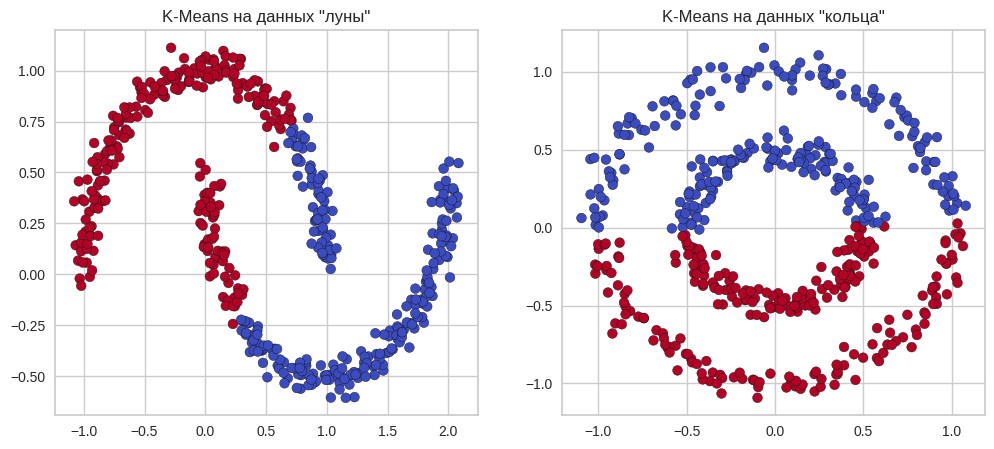

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_circles

# Генерируем данные в виде "луны" и "колец"
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Применяем K-Means с K=2
kmeans_moons = KMeans(n_clusters=2, random_state=42).fit(X_moons)
kmeans_circles = KMeans(n_clusters=2, random_state=42).fit(X_circles)

# Визуализация результатов
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X_moons[:, 0], X_moons[:, 1], c=kmeans_moons.labels_, cmap='coolwarm', edgecolors='k')
ax[0].set_title('K-Means на данных "луны"')

ax[1].scatter(X_circles[:, 0], X_circles[:, 1], c=kmeans_circles.labels_, cmap='coolwarm', edgecolors='k')
ax[1].set_title('K-Means на данных "кольца"')

plt.show()

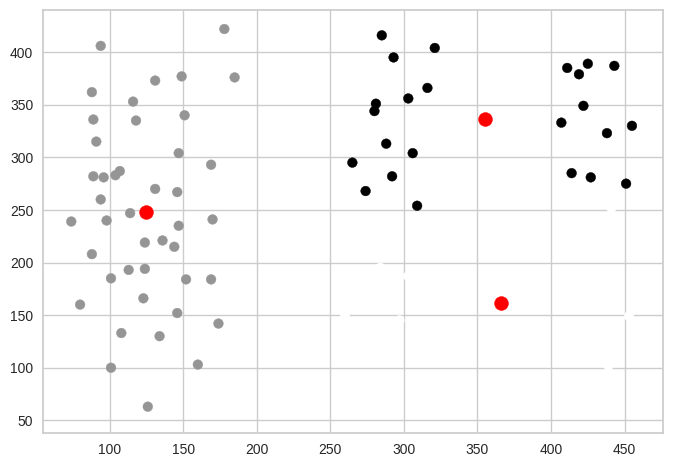

In [27]:
v_stripes = pd.DataFrame([(126, 63), (101, 100), (80, 160), (88, 208), (89, 282), (88, 362), (94, 406), (149, 377), (147, 304), (147, 235), (146, 152), (160, 103), (174, 142), (169, 184), (170, 241), (169, 293), (185, 376), (178, 422), (116, 353), (124, 194), (273, 69), (277, 112), (260, 150), (265, 185), (270, 235), (265, 295), (281, 351), (285, 416), (321, 404), (316, 366), (306, 304), (309, 254), (309, 207), (327, 161), (318, 108), (306, 66), (425, 66), (418, 135), (411, 183), (413, 243), (414, 285), (407, 333), (411, 385), (443, 387), (455, 330), (441, 252), (457, 207), (453, 149), (455, 90), (455, 56), (439, 102), (431, 162), (431, 193), (426, 236), (427, 281), (438, 323), (419, 379), (425, 389), (422, 349), (451, 275), (441, 222), (297, 145), (284, 195), (288, 237), (292, 282), (288, 313), (303, 356), (293, 395), (274, 268), (280, 344), (303, 187), (114, 247), (131, 270), (144, 215), (124, 219), (98, 240), (96, 281), (146, 267), (136, 221), (123, 166), (101, 185), (152, 184), (104, 283), (74, 239), (107, 287), (118, 335), (89, 336), (91, 315), (151, 340), (131, 373), (108, 133), (134, 130), (94, 260), (113, 193)])

number_of_centers2 = 3

from sklearn.cluster import KMeans

model2 = KMeans(number_of_centers2)
model2.fit(v_stripes)

plt.scatter(v_stripes[0] , v_stripes[1], c = model2.labels_);
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s = 100, color = "red");

### Чувствительность к выбросам

Проблема: Выбросы могут сильно сместить центроиды кластеров, ухудшая качество разбиения.

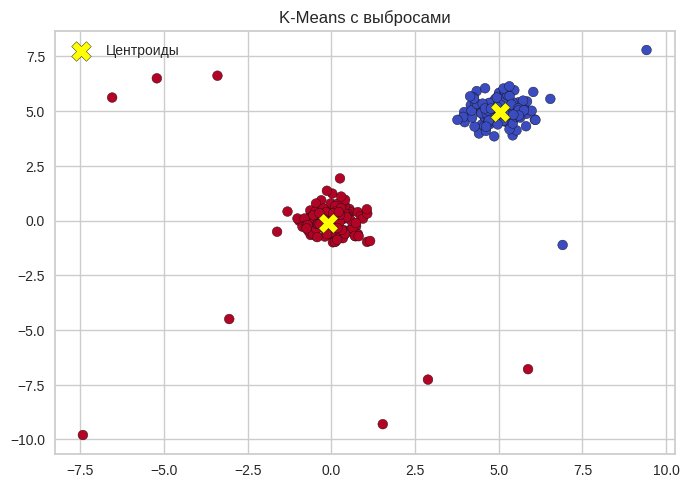

In [21]:
from sklearn.datasets import make_blobs

# Генерируем данные с двумя плотными кластерами
X, _ = make_blobs(n_samples=300, centers=[(0, 0), (5, 5)], cluster_std=0.5, random_state=42)

# Добавляем выбросы
outliers = np.random.uniform(low=-10, high=10, size=(10, 2))
X = np.vstack([X, outliers])

# Применяем K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', edgecolors='k', label="Центроиды")
plt.legend()
plt.title("K-Means с выбросами")
plt.show()

### Разная плотность кластеров

Проблема: K-Means плохо работает, если у кластеров разная плотность, так как он минимизирует среднее внутрикластерное расстояние.

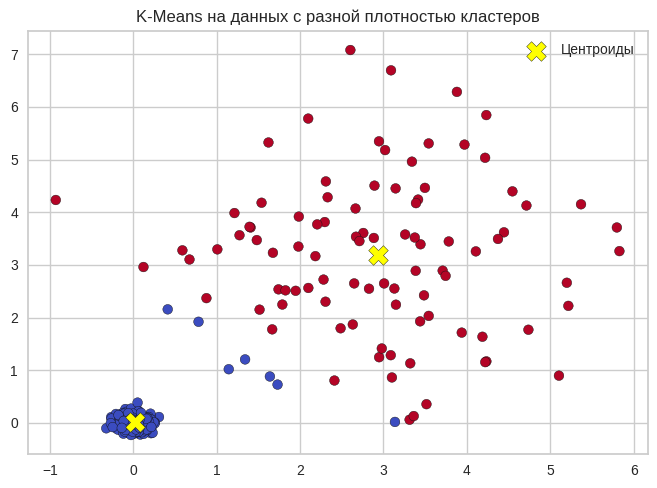

In [22]:
X_dense, _ = make_blobs(n_samples=400, centers=[(0, 0)], cluster_std=0.1, random_state=42)
X_sparse, _ = make_blobs(n_samples=100, centers=[(3, 3)], cluster_std=1.5, random_state=42)
X = np.vstack([X_dense, X_sparse])

# Применяем K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', edgecolors='k', label="Центроиды")
plt.legend()
plt.title("K-Means на данных с разной плотностью кластеров")
plt.show()